In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import fisherlib as fish

Computing interpolating functions...
done.


Compute the fisher information for a homogenous random recurrent network, as a function of the mean coupling strength $g$

In [114]:
params = dict(sigma_internal = 0.05, sig_obs = 0.5,interp = True)
g_range = np.linspace(0,2.5,80)

single_info = np.array([fish.calc_single_info(g,**params) for g in g_range])

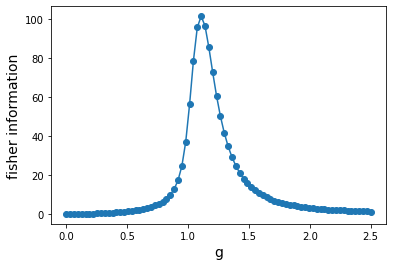

In [115]:
plt.plot(g_range,single_info,marker='o')
plt.xlabel('g',fontsize=14);
plt.ylabel('fisher information',fontsize=14)
plt.show()

Compute the maximal fisher information for two uncoupled RNNS, with mean coupling strengths $g_1$ and $g_2$

In [109]:
def G_decoupled(g1,g2,f1):
    gmat = np.diag([g1**2,g2**2])
    return gmat*np.array([f1,1-f1])

g_grid = np.meshgrid(g_range,g_range,indexing='ij')

f1 = 0.25; # fractional size of the first population
fracs = np.array([f1,1-f1])

decoupled_info = np.vectorize(
    lambda g1,g2: fish.calc_max_info(G_decoupled(g1,g2,f1),fracs,**params)
                             )(*g_grid)

Plot the information vs coupling strengths

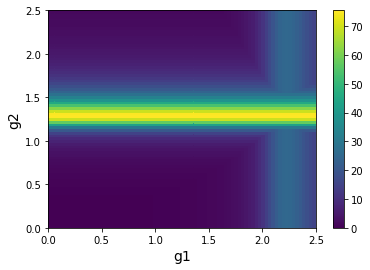

In [110]:
plt.pcolor(g_grid[0],g_grid[1],decoupled_info)
plt.xlabel('g1',fontsize=14)
plt.ylabel('g2',fontsize=14)
plt.colorbar()
plt.show()

Compute the maximal fisher information for two coupled RNNs

In [111]:
def G_coupled(g1,g2,f1):
    gmat = np.array([[g1,0.2],[1,g2]])
    return (gmat**2)*np.array([f1,1-f1])
f1 = 0.25
coupled_info = np.vectorize(
    lambda g1,g2: fish.calc_max_info(G_coupled(g1,g2,f1),fracs,**params)
                             )(*g_grid)

Plot the information vs coupling strengths

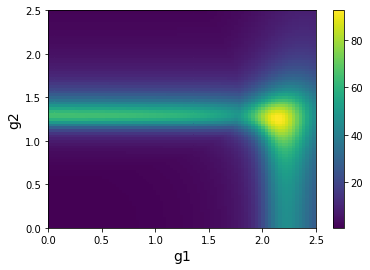

In [112]:
plt.pcolor(g_grid[0],g_grid[1],coupled_info)
plt.xlabel('g1',fontsize=14)
plt.ylabel('g2',fontsize=14)
plt.colorbar()
plt.show()